In [10]:
import gc
import glob
import os

import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import py3Dmol
from rdkit import Chem, rdBase
from rdkit.Chem import AllChem, Descriptors, PandasTools
from rdkit.Chem.Draw import IPythonConsole

In [11]:
df = pd.read_csv("../input/PubChem_compound_smarts_O=C(O).csv")
df

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpfamilycnt,neighbortype,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,4109,Methomyl,16752-77-5|Lannate|Mesomile|Methomyl|Methyl N-...,162.21,C5H10N2O2S,76.0,147.0,0.6,10,1,...,498,2D+3D,Methomyl,Agrochemical Information|Biological Test Resul...,16,425000|977599|977602|1081777|1081778|1081779|1...,20050325,3B Scientific (Wuhan) Corp|ABI Chem|Acadechem|...,Chemical Vendors|Curation Efforts|Governmental...,D004791 - Enzyme Inhibitors|D010575 - Pesticid...
1,6249,Ampicillin,69-53-4|Ampicillin|Aminobenzylpenicillin|Ampic...,349.40,C16H19N3O4S,138.0,562.0,-1.1,24,3,...,69138,2D+3D,Ampicillin,Biological Test Results|Chemical and Physical ...,16,357|361|364|368|371|373|374|375|411|422|425|42...,20050624,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C254 - Anti-Infective Agent > C258 - Antibioti...
2,6277,Cobalt(II) acetate,Cobalt acetate|Cobalt(II) acetate|71-48-7|Coba...,177.02,C4H6CoO4,80.3,25.5,NaN,9,0,...,20991,2D,NaN,Biological Test Results|Chemical and Physical ...,14,651631|651632|651633|651634|720516|720552|7206...,20050719,3B Scientific (Wuhan) Corp|3WAY PHARM INC|ABI ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,10112,Calcium Carbonate,Aragonite|CALCIUM CARBONATE|471-34-1|Limestone...,100.09,CCaO3,63.2,18.8,NaN,5,0,...,119575,2D,Calcium Carbonate,Agrochemical Information|Biological Test Resul...,16,1259407|1259409,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,A - Alimentary tract and metabolism > A02 - Dr...
4,36314,Paclitaxel,33069-62-4|P88XT4IS4D|Paclitaxel|Taxol|Taxol A...,853.90,C47H51NO14,221.0,1790.0,2.5,62,4,...,64277,2D,NaN,Biological Test Results|Chemical and Physical ...,15,1|3|5|7|9|11|13|15|17|19|21|23|25|27|29|31|33|...,20050326,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C186664 - Cytoto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60148448,Pharmakon1600-01503834,GADOTERIDOL|120066-54-8|Pharmakon1600-01503834...,559.70,C17H30GdN4O7+,134.0,494.0,NaN,29,1,...,0,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1794731|1794732|1794733|1794735|1794736|179473...,20120831,DTP/NCI|ToxPlanet,Governmental Organizations|Legacy Depositors|S...,V - Various > V08 - Contrast media > V08C - Ma...
996,133562742,"(3S,5R,6R,7S,9S,12S,13S,14R)-6-[(2R,3S,4R,6S)-...",oleandomycin,687.90,C35H61NO12,166.0,1090.0,2.6,48,3,...,0,2D,Oleandomycin,Chemical and Physical Properties|Classificatio...,13,NaN,20180525,Ambinter|Wikidata,Chemical Vendors|Curation Efforts,D000890 - Anti-Infective Agents > D000900 - An...
997,134755071,"methyl (9R,10S,11S,12R,19R)-11-acetyloxy-12-et...",vincristine,825.00,C46H56N4O10,171.0,1750.0,2.8,60,3,...,0,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1508598,20180905,Cheminformatics Friedrich-Schiller-University ...,Legacy Depositors|Research and Development,L - Antineoplastic and immunomodulating agents...
998,136601293,"[(7S,9Z,11S,12R,13S,14R,15R,16R,17S,18S,19Z,21...",rifampin|Rifampicin|CHEMBL1523493|PD087064,822.90,C43H58N4O12,220.0,1620.0,4.9,59,6,...,2,2D,Rifampin,Biological Test Results|Chemical and Physical ...,13,1671498,20190124,ChEMBL|Google Patents|Human Metabolome Databas...,Curation Efforts|Research and Development,D000890 - Anti-Infective Agents > D000900 - An...


In [12]:
# dfから'cmpdname'と'canonicalsmiles'のみを抽出
df = df[["cmpdname", "canonicalsmiles"]]
df

,cmpdname,canonicalsmiles
0,Methomyl,CC(=NOC(=O)NC)SC
1,Ampicillin,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...
2,Cobalt(II) acetate,CC(=O)[O-].CC(=O)[O-].[Co+2]
3,Calcium Carbonate,C(=O)([O-])[O-].[Ca+2]
4,Paclitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...
...,...,...
995,Pharmakon1600-01503834,CC(CN1CCN(CCN(CCN(CC1)CC(=O)[O-])CC(=O)[O-])CC...
996,"(3S,5R,6R,7S,9S,12S,13S,14R)-6-[(2R,3S,4R,6S)-...",CC1CC(C(C(O1)OC2C(CC3(CO3)C(=O)C(C(C(C(OC(=O)C...
997,"methyl (9R,10S,11S,12R,19R)-11-acetyloxy-12-et...",CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
998,"[(7S,9Z,11S,12R,13S,14R,15R,16R,17S,18S,19Z,21...",CC1C=CC=C(C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=...


,cmpdname,canonicalsmiles,ROMol
0,Methomyl,CC(=NOC(=O)NC)SC,
1,Ampicillin,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...,
2,Cobalt(II) acetate,CC(=O)[O-].CC(=O)[O-].[Co+2],
3,Calcium Carbonate,C(=O)([O-])[O-].[Ca+2],
4,Paclitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,
...,...,...,...
995,Pharmakon1600-01503834,CC(CN1CCN(CCN(CCN(CC1)CC(=O)[O-])CC(=O)[O-])CC...,
996,"(3S,5R,6R,7S,9S,12S,13S,14R)-6-[(2R,3S,4R,6S)-...",CC1CC(C(C(O1)OC2C(CC3(CO3)C(=O)C(C(C(C(OC(=O)C...,
997,"methyl (9R,10S,11S,12R,19R)-11-acetyloxy-12-et...",CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,
998,"[(7S,9Z,11S,12R,13S,14R,15R,16R,17S,18S,19Z,21...",CC1C=CC=C(C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=...,

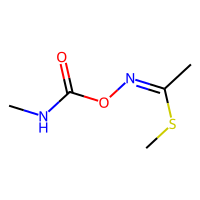
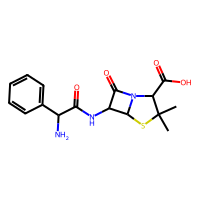
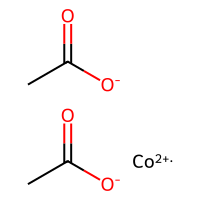
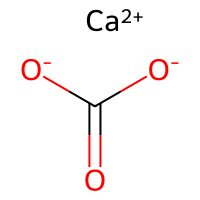
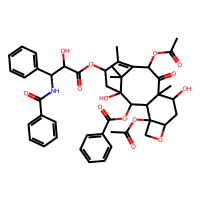
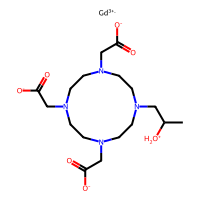
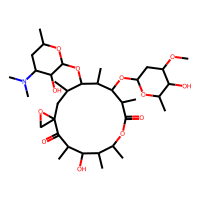
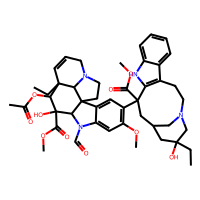
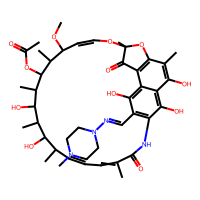
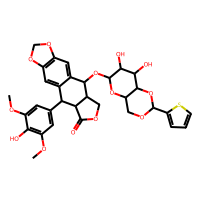

In [13]:
PandasTools.AddMoleculeColumnToFrame(df, "canonicalsmiles")
df

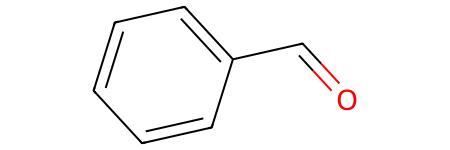

In [14]:
benzoyl_group = Chem.MolFromSmiles('c1ccccc1C=O')
benzoyl_group

In [15]:
# dfのROMol列をmolsというリストに格納
mols = df["ROMol"].tolist()
mols

In [16]:
# benzoyl_group_compoundsを含むものをスクリーニング
benzoyl_group_compounds = []
not_benzoyl_group_compounds = []
for mol in mols:
    if mol.HasSubstructMatch(benzoyl_group):
        benzoyl_group_compounds.append(mol)
    else:
        not_benzoyl_group_compounds.append(mol)

In [17]:
# benzoyl_group_compoundsとnot_benzoyl_group_compoundsの数をカウント
print(len(benzoyl_group_compounds))
print(len(not_benzoyl_group_compounds))

136
864


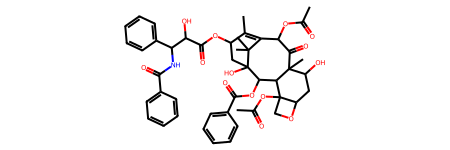

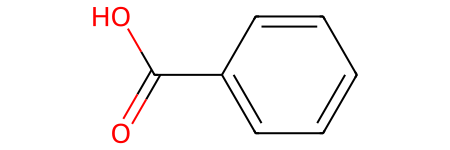

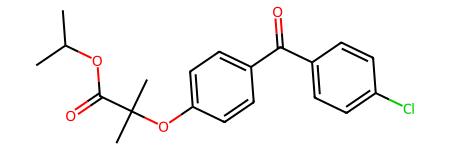

In [20]:
# benzoyl_group_compoundsの化合物を描画
for mol in benzoyl_group_compounds[0:3]:
    display(mol)

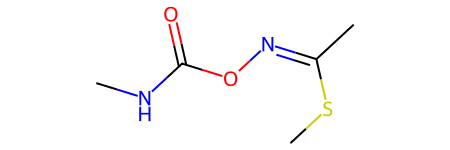

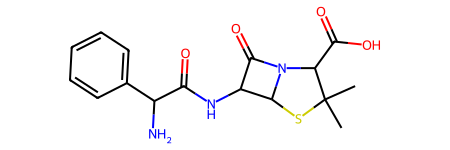

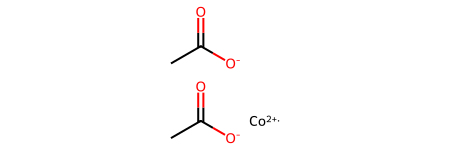

In [21]:
# not_benzoyl_group_compoundsの化合物を描画
for mol in not_benzoyl_group_compounds[0:3]:
    display(mol)